<a href="https://colab.research.google.com/github/Oebele/Deep-lerning-for-beginners/blob/master/_Preparing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Data

## The Cleveland Heart Disease dataset¶


In [11]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

--2020-09-30 09:14:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18461 (18K) [application/x-httpd-php]
Saving to: ‘processed.cleveland.data.1’

processed.cleveland 100%[===================>]  18.03K  --.-KB/s    in 0.05s   

2020-09-30 09:14:02 (347 KB/s) - ‘processed.cleveland.data.1’ saved [18461/18461]



In [13]:
import pandas as pd
df = pd.read_csv('processed.cleveland.data', header=None)
print(df.head())

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [14]:
print(set(df[13]))


{0, 1, 2, 3, 4}


In [15]:
df[13].replace(to_replace=[2,3,4], value=1, inplace=True)
print(df.head())
print(set(df[13]))

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   1
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
{0, 1}


In [16]:
df.tail()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


## Binarizing the MNIST dataset


### Binarizing the images


In [17]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape)
print(mnist.target.shape)


(70000, 784)
(70000,)


In [18]:
print(mnist.data[0].reshape(28, 28)[10:18,10:18])
mnist.data[mnist.data < 128] = 0
mnist.data[mnist.data >=128] = 1
print(mnist.data[0].reshape(28, 28)[10:18,10:18])


[[  1. 154. 253.  90.   0.   0.   0.   0.]
 [  0. 139. 253. 190.   2.   0.   0.   0.]
 [  0.  11. 190. 253.  70.   0.   0.   0.]
 [  0.   0.  35. 241. 225. 160. 108.   1.]
 [  0.   0.   0.  81. 240. 253. 253. 119.]
 [  0.   0.   0.   0.  45. 186. 253. 253.]
 [  0.   0.   0.   0.   0.  16.  93. 252.]
 [  0.   0.   0.   0.   0.   0.   0. 249.]]
[[0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


### Binarizing the targets


In [19]:
X = mnist.data[(mnist.target == '7') | (mnist.target == '8')]
y = mnist.target[(mnist.target == '7') | (mnist.target == '8')]
print(X.shape)
print(y.shape)


(14118, 784)
(14118,)


In [20]:
print(y[:10])
y = [0 if v=='7' else 1 for v in y]
print(y[:10])

['7' '8' '7' '8' '7' '8' '7' '8' '7' '8']
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


## Converting string labels to numbers


In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
print(sorted(list(set(mnist.target))))

le.fit(sorted(list(set(mnist.target))))


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


LabelEncoder()

In [22]:
print(le.transform(["9", "3", "7"]) )

list(le.inverse_transform([2, 2, 1]))

[9 3 7]


['2', '2', '1']

In [23]:
print("Before ", mnist.target[:3])
y = le.transform(mnist.target)
print("After ", y[:3])


Before  ['5' '0' '4']
After  [5 0 4]


## Converting categories to one-hot encoding


In [27]:
import pandas as pd
df=pd.DataFrame({'Gender': ['female','male','male',
                            'female','female', 'somethingelse']})
print(df)

          Gender
0         female
1           male
2           male
3         female
4         female
5  somethingelse


In [28]:
pd.get_dummies(df, prefix=['Gender'])


,Gender_female,Gender_male,Gender_somethingelse
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,0,1


In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = [list(v) for v in mnist.target] # reformat for sklearn
enc.fit(y)

print('Before: ', y[0])
y = enc.transform(y).toarray()
print('After: ', y[0])
print(enc.get_feature_names())

Before:  ['5']
After:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
['x0_0' 'x0_1' 'x0_2' 'x0_3' 'x0_4' 'x0_5' 'x0_6' 'x0_7' 'x0_8' 'x0_9']


## Real-valued data and univariate regression

Most machine learning methodologies work better if the data for regression is **normalized**. By that, we mean that the data will have special statistical properties that will make calculations more stable. This is critical for many deep learning algorithms that suffer from vanishing or exploding gradients (Hanin, B. (2018)). For example, in calculating a gradient in a neural network, an error needs to be propagated backward from the output layer to the input layer; but if the output layer has a large error and the range of values (that is their distribution) is also large, then the multiplications going backward can cause overflow on variables, which would ruin the training process. 



### Scaling to a specific range of values


In [32]:
df = pd.read_csv('processed.cleveland.data', header=None)
df[[4,9]].describe()


,4,9
count,303.000000,303.000000
mean,246.693069,1.039604
std,51.776918,1.161075
min,126.000000,0.000000
25%,211.000000,0.000000
50%,241.000000,0.800000
75%,275.000000,1.600000
max,564.000000,6.200000


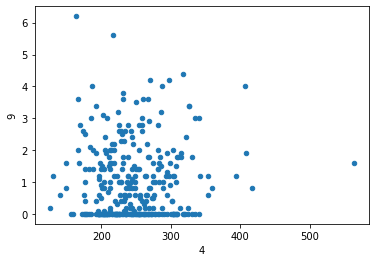

In [37]:
df[[4,9]].plot.scatter(x=4, y=9);

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 150

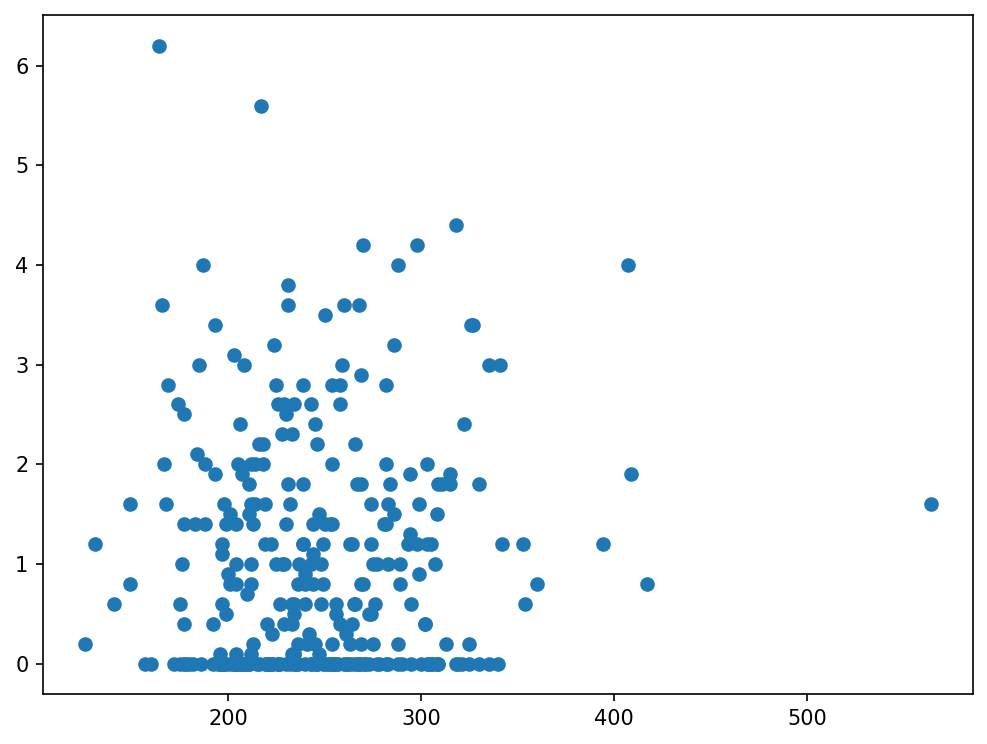

In [41]:
plt.scatter(x=df[4], y=df[9]);

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[[4,9]])
df[[4,9]] = scaler.transform(df[[4,9]])
df[[4,9]].describe()

,4,9
count,303.000000,303.000000
mean,0.275555,0.167678
std,0.118212,0.187270
min,0.000000,0.000000
25%,0.194064,0.000000
50%,0.262557,0.129032
75%,0.340183,0.258065
max,1.000000,1.000000
